In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import seaborn as sns

In [2]:
sys.path.insert(0, '../src/py-oeis/')

In [3]:
import oeis.etl.extract as extract
import oeis.etl.features as feats
import oeis.viz.plotting as plotting

In [4]:
seqs = extract.load_sequences()

In [5]:
features = extract.load_features()

In [36]:
poss_dec = (
    features.loc[
        (features.logmax <= 1.0) & 
        (features.nonneg == 1.0) & 
        (features.uniq == 10)
    ]
)

In [37]:
dec_seq = {k:seqs[k] for k in poss_dec.index}

In [38]:
len(poss_dec)

10502

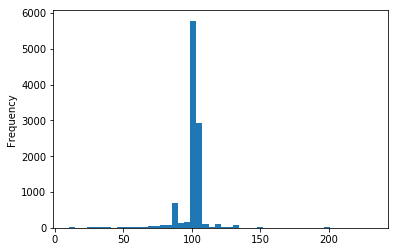

In [39]:
poss_dec.length.plot(kind='hist', bins=50);

In [40]:
print(poss_dec.length.describe().to_string())

count    10502.000000
mean        99.747858
std         10.871887
min         10.000000
25%         99.000000
50%         99.000000
75%        105.000000
max        232.000000


In [41]:
PAD = 120
for k, v in dec_seq.items():
    d = (PAD - len(v))
    if d >= 0:
        dec_seq[k] = v + [np.NaN]*d
    else:
        dec_seq[k] = v[:PAD]

In [43]:
dec = pd.DataFrame(dec_seq).T

In [72]:
dec['tag'] = 1.0

In [76]:
rand_dec = pd.DataFrame(np.random.randint(0,9, size=(len(dec), PAD)))

In [78]:
rand_dec['tag'] = 0.0

In [81]:
pd.concat([dec, rand_dec]).head()

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,tag
A000030,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
A000455,1.0,2.0,4.0,8.0,1.0,6.0,3.0,2.0,6.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
A000796,3.0,1.0,4.0,1.0,5.0,9.0,2.0,6.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
A001073,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
A001113,2.0,7.0,1.0,8.0,2.0,8.0,1.0,8.0,2.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
